# 街道路网轴线

计算街道网络方位，并可视化街道网络的空间方向。请参阅此笔记本以获得更好的示例！

In [1]:
import matplotlib.pyplot as plt
import osmnx as ox
import pandas as pd
%matplotlib inline
ox.config(log_console=True, use_cache=True)
ox.__version__

'0.11dev'

###  首先，看看非网格街道网络

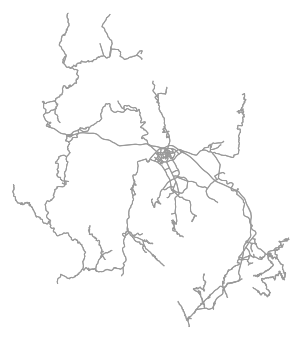

In [2]:
G = ox.graph_from_place('Huangshan District,Huangshan,Anhui, CN', network_type='drive')
fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

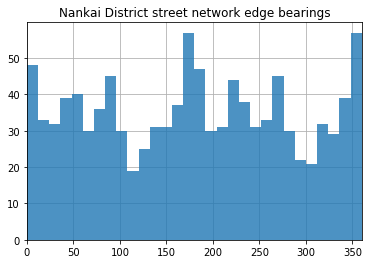

In [3]:
# 计算边的轴线并可视化其频率
G = ox.add_edge_bearings(G)
bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
xlim = ax.set_xlim(0, 360)
ax.set_title('Nankai District street network edge bearings')
plt.show()

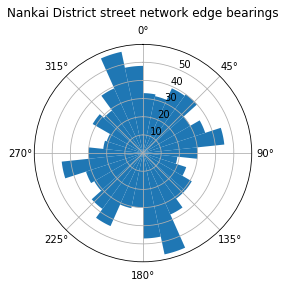

In [4]:
# 雷达图
import numpy as np
n = 30
count, division = np.histogram(bearings, bins=[ang*360/n for ang in range(0,n+1)])
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=0.0)
ax.set_title('Nankai District street network edge bearings', y=1.1)
plt.show()

#### 现在来看一个网格化的街道网络

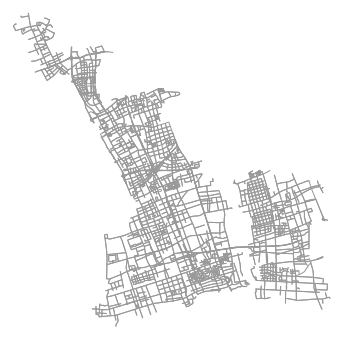

In [5]:
G = ox.graph_from_place('Minhang District,Shanghai,CN', network_type='drive')
fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

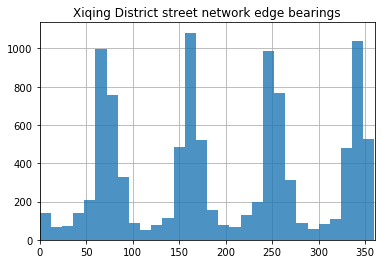

In [6]:
# calculate edge bearings and visualize their frequency
G = ox.add_edge_bearings(G)
bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
ax.set_xlim(0, 360)
ax.set_title('Xiqing District street network edge bearings')
plt.show()

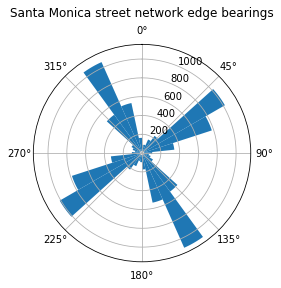

In [7]:
# 雷达图
n = 30
count, division = np.histogram(bearings, bins=[ang*360/n for ang in range(0,n+1)])
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=20.0)
ax.set_title('Santa Monica street network edge bearings', y=1.1)
plt.show()